<a href="https://colab.research.google.com/github/Nelson-Muteti/IP_Week_8/blob/main/Nelson_Muteti_Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining The Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. I am supposed to use the data provided to build and optimise classification models using Support Vector Machines and Decision Trees / Random Forest.

In [152]:
#first import some of the libraries we will use
#Other libraries are imported as the project needs arise
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


## Defining Metrics for Success

The project will be considered succesful if the models created are able to accurately classify whether an individual has Hypothyroid or not, while at the same time defining a good bias variance trade-off(avoid over-fitting)

## Understanding The context.

The context here is a medical one. We have to understand some terminologies asscociated with Hypothyroid in order to gain a better understanding of the data and the problem statement.  

## Experimental Design
We will first clean the data and remove some anomalies. Then,we will build a random forest and try to use AdaBoost to optimize the model. We will then  identify the most significant variables. Afterwards, we will downsample and further clean our data in preparation for SVM. We will then build several SVM models using different Kernel functions and compare them.

## Read the data

In [153]:
#read the data into a csv file and get the shape
df = pd.read_csv('/content/hypothyroid.csv')
df.shape
#3163 rows of data and 26 columns

(3163, 26)

In [154]:
#view the data
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?


In [155]:
#get numerical statistics about data
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [156]:
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

## External Data Validation

For this, I used the [UCI Machine learning Repository](https://archive.ics.uci.edu/ml/datasets/thyroid+disease) to validate the data.

## Data Cleaning

In [157]:
df['age'].value_counts()

?     446
59     64
60     64
62     63
28     60
     ... 
5       1
97      1
98      1
90      1
93      1
Name: age, Length: 93, dtype: int64

In [158]:
df.drop(df.index[df['age'] == '?'], inplace = True)

In [159]:
df.shape

(2717, 26)

In [160]:
df['age'] = df['age'].astype(int)

In [161]:
df['sex'].value_counts()

F    1909
M     791
?      17
Name: sex, dtype: int64

In [162]:
df.drop(df.index[df['sex'] == '?'],inplace=True)

In [163]:
df['status'].value_counts()

negative       2564
hypothyroid     136
Name: status, dtype: int64

In [164]:
df['lithium'].value_counts()

f    2698
t       2
Name: lithium, dtype: int64

In [165]:
df['TBG'].value_counts()
#this column has way too many unknown values (?)

?       2475
21        13
28        13
23        13
30        12
20        11
25        11
31        11
33         9
19         9
29         8
26         8
27         7
17         7
32         7
18         6
38         6
36         6
35         5
34         5
39         5
16         5
108        4
37         4
40         3
22         3
110        3
24         3
65         2
41         2
43         2
14         2
15         2
0          1
47         1
86         1
8.40       1
12         1
7.30       1
50         1
48         1
52         1
3.10       1
9.30       1
13         1
80         1
11         1
69         1
45         1
63         1
122        1
Name: TBG, dtype: int64

In [166]:
#drop the tbg column
df.drop(['TBG','TBG_measured'],axis=1,inplace=True)

In [167]:
df['TT4'].value_counts()

?       217
98       42
106      42
87       39
90       37
       ... 
269       1
301       1
2.30      1
282       1
6         1
Name: TT4, Length: 254, dtype: int64

In [168]:
df.drop(df.index[df['TT4'] == '?'],inplace=True)
df.drop(df.index[df['T3'] == '?'],inplace=True)
df.drop(df.index[df['T4U'] == '?'],inplace=True)
df.drop(df.index[df['TSH'] == '?'],inplace=True)

In [169]:
df['T3'].value_counts()

1.80    116
1.70    116
1.60    114
2       110
2.10    105
       ... 
5.50      1
9.80      1
4.80      1
8.90      1
8.10      1
Name: T3, Length: 62, dtype: int64

In [170]:
df['T3_measured'].value_counts()

y    2000
Name: T3_measured, dtype: int64

In [171]:
df['TSH'].value_counts()

0       644
0.70     58
0.80     58
0.90     53
1.30     52
       ... 
165       1
138       1
45        1
33        1
58        1
Name: TSH, Length: 210, dtype: int64

In [172]:
df.shape

(2000, 24)

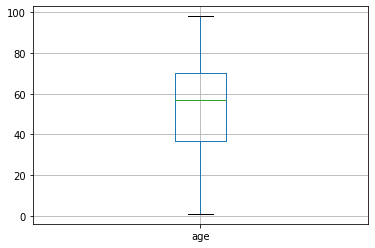

In [173]:
#check for outliers in age column
df.boxplot(column='age')

In [174]:
#check for outliers in age column
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17


In [175]:
df['on_antithyroid_medication'].value_counts()

f    1973
t      27
Name: on_antithyroid_medication, dtype: int64

In [176]:
#rename a value
df.status = df.status.replace({'hypothyroid': 'Positive'})
                                                   

In [177]:
df.shape

(2000, 24)

In [178]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,Positive,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,Positive,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17


In [179]:
df['FTI'] = df['FTI'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['TSH'] = df['TSH'].astype(float)

In [180]:
df.to_csv('Clean_Thyroid.csv')

In [181]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,Positive,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,Positive,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0


## Exploratory Data Analysis

First some Univariate EDA

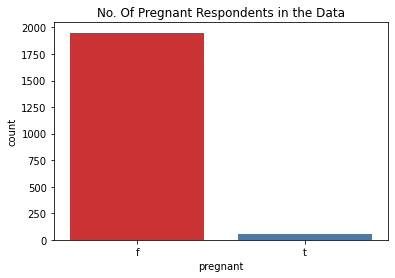

In [182]:
#univariate analysis
#share of pregnant people in data
import seaborn as sns
sns.countplot(x = 'pregnant',palette='Set1',data = df)
plt.title('No. Of Pregnant Respondents in the Data')
plt.show()

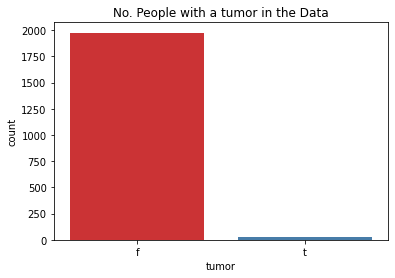

In [183]:
#univariate analysis
#share of patients with a tumor in data
sns.countplot(x = 'tumor',palette='Set1',data = df)
plt.title('No. People with a tumor in the Data')
plt.show()

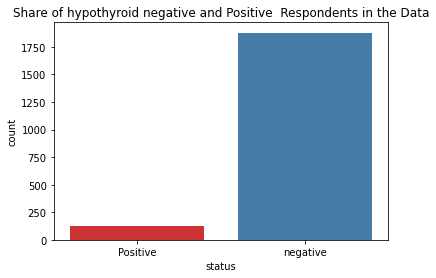

In [184]:
#univariate analysis
#share of Hypothyroid patients in data
sns.countplot(x = 'status',palette='Set1',data = df)
plt.title('Share of hypothyroid negative and Positive  Respondents in the Data')
plt.show()

Then Bivariate EDA

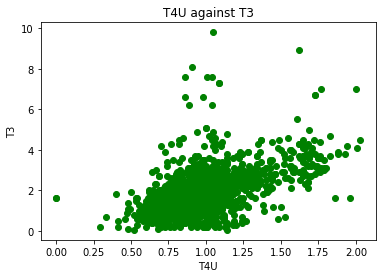

0.49967572116055475


In [185]:
#now for some bivariate EDA
#plot relationship between T3 and FTI
plt.scatter(df['T4U'],df['T3'],color = 'green')
plt.title('T4U against T3')
plt.xlabel('T4U')
plt.ylabel('T3')
plt.show()

coef = df['T4U'].corr(df['T3'])
print(coef)

#relatively moderate correlation between T3 and T4U

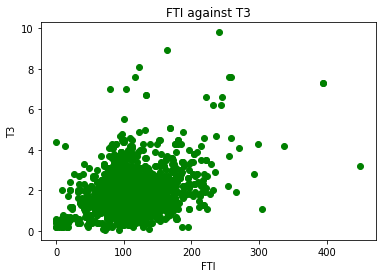

0.33548252194184724


In [186]:
#now for some bivariate EDA
#plot relationship between T3 and FTI
plt.scatter(df['FTI'],df['T3'],color = 'green')
plt.title('FTI against T3')
plt.xlabel('FTI')
plt.ylabel('T3')
plt.show()

coef = df['FTI'].corr(df['T3'])
print(coef)

#relatively weak correlation between T3 and FTI

Multivariate EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


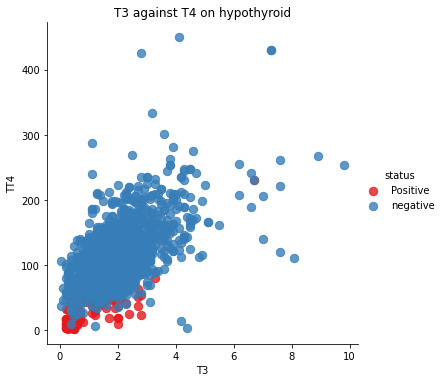

In [187]:
#Multivariate analysis

sns.lmplot('T3','TT4',data = df,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against T4 on hypothyroid')

plt.show()

#T3 and T4 values are low for individuals with hypothyroid 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


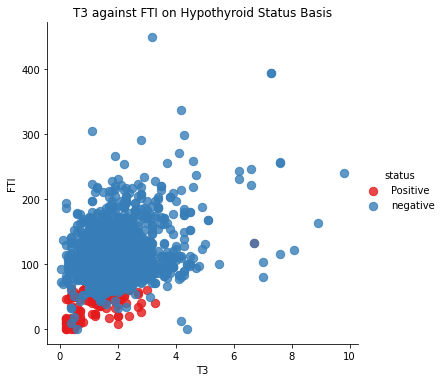

In [188]:
import seaborn as sns
sns.lmplot('T3','FTI',data = df,palette='Set1',hue='status',fit_reg=False, scatter_kws={"s": 70})
plt.title('T3 against FTI on Hypothyroid Status Basis')

plt.show()

#the only cases of Hypothyroid have low levels of FTI and T3

## Encoding and Multicollinearity
Here we use the LabelEncoder() from sklearn.preprocessing to encode the categorical columns.

In [189]:
#first encode the data

enc = df.dtypes == object
myenc = df.columns[enc].tolist()

from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()

df[myenc] = df[myenc].apply(lambda col:lenc.fit_transform(col))
df.head(2)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0


In [190]:
#then check for mutlicollinearity
data = df.drop(columns=['status'])

# Let's display the correlations between the variables
correlations = data.corr()

correlations

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
age,1.000000,-0.003711,-0.030972,-0.009678,-0.067312,-0.024871,0.045694,-0.074038,-0.193525,0.062583,-0.065895,-0.028892,-0.071945,NaN,-0.003414,NaN,-0.344661,NaN,-0.123445,NaN,-0.249693,NaN,0.026850
sex,-0.003711,1.000000,-0.130928,0.013576,-0.061573,-0.057584,-0.088285,-0.078853,-0.109721,0.020555,-0.019182,-0.021679,-0.086347,NaN,-0.056956,NaN,-0.097376,NaN,-0.177993,NaN,-0.249017,NaN,-0.047062
on_thyroxine,-0.030972,-0.130928,1.000000,-0.010102,-0.018882,0.038433,0.137478,-0.071979,0.015337,-0.071671,-0.029635,-0.012122,0.002013,NaN,-0.003601,NaN,0.037829,NaN,0.210875,NaN,0.072485,NaN,0.177283
query_on_thyroxine,-0.009678,0.013576,-0.010102,1.000000,-0.012051,0.059088,0.007262,-0.028693,-0.016495,-0.021299,0.076713,-0.003259,0.044085,NaN,-0.022898,NaN,-0.017305,NaN,-0.002250,NaN,-0.041932,NaN,0.030740
on_antithyroid_medication,-0.067312,-0.061573,-0.018882,-0.012051,1.000000,-0.022606,-0.033669,0.084746,0.009019,-0.024188,-0.013161,-0.003701,-0.019301,NaN,0.000551,NaN,0.082733,NaN,-0.009509,NaN,0.032434,NaN,-0.029542
thyroid_surgery,-0.024871,-0.057584,0.038433,0.059088,-0.022606,1.000000,0.015066,0.018856,-0.013753,-0.039957,-0.021742,-0.006114,-0.015173,NaN,0.009550,NaN,-0.001087,NaN,-0.019027,NaN,0.014970,NaN,-0.022632
query_hypothyroid,0.045694,-0.088285,0.137478,0.007262,-0.033669,0.015066,1.000000,-0.029226,-0.009940,-0.059511,-0.032382,0.050411,-0.024062,NaN,0.053470,NaN,-0.038018,NaN,0.009908,NaN,0.009832,NaN,-0.015522
query_hyperthyroid,-0.074038,-0.078853,-0.071979,-0.028693,0.084746,0.018856,-0.029226,1.000000,0.066904,-0.057594,-0.031339,-0.008813,0.038345,NaN,-0.035411,NaN,0.200183,NaN,0.157951,NaN,0.079484,NaN,0.129400
pregnant,-0.193525,-0.109721,0.015337,-0.016495,0.009019,-0.013753,-0.009940,0.066904,1.000000,-0.033109,0.010809,-0.005066,0.093216,NaN,-0.016759,NaN,0.245750,NaN,0.195042,NaN,0.394950,NaN,-0.023529
sick,0.062583,0.020555,-0.071671,-0.021299,-0.024188,-0.039957,-0.059511,-0.057594,-0.033109,1.000000,-0.023263,-0.006542,-0.034114,NaN,-0.009997,NaN,-0.109648,NaN,-0.049137,NaN,-0.067527,NaN,-0.016917


## Implementing the solution
We first build a random Forest classifier

## Random Forest

In [191]:
#build a Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

feat = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4','T4U_measured', 'T4U', 'FTI_measured', 'FTI']
X = df[feat].values

y = df['status'].values


In [192]:
#split,train and test random forest model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

forest = RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini',max_depth=5,min_samples_split=10)

forest = forest.fit(X_train,y_train)

mypred = forest.predict(X_test)

In [193]:
#check accuracy of Random Forest model

from sklearn.metrics import accuracy_score

myaccu = accuracy_score(y_test,mypred)

myaccu * 100

#98% accuracy seems way too high.
#Probably data is overfitted

98.0

98% accuracy seems good. Lets Visualise a decision tree in this model.

In [194]:
df['status'].value_counts()

1    1878
0     122
Name: status, dtype: int64

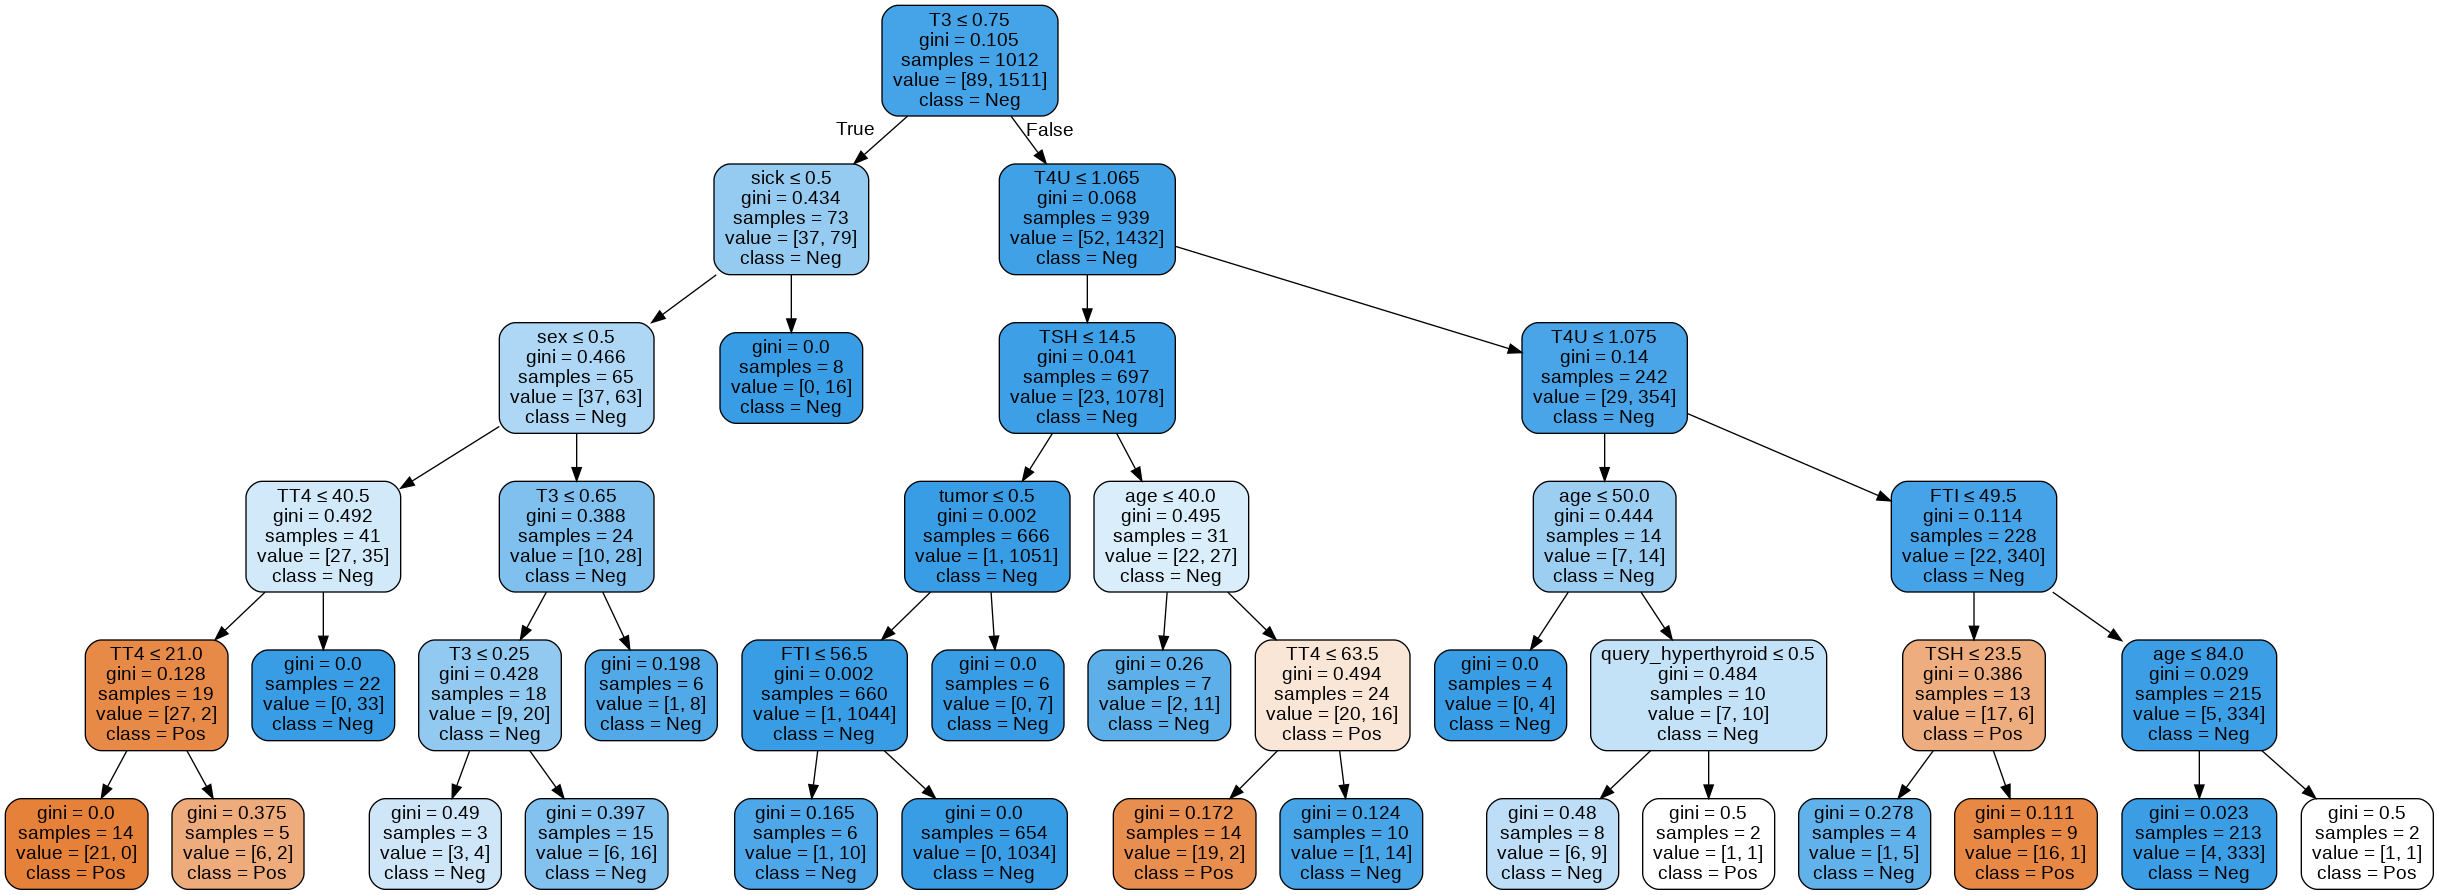

In [195]:
#get specific tree from random forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[30]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names = ['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid.png')
Image(graph.create_png())

**Above is a decison tree derived from the random forest with an optimized depth of 5 and minimum samples required for a split set at 10.**

**Now lets try to get the most significant variables from the Random Forest**

In [196]:
# find the most significant features in data
importances = list(tree.feature_importances_)

features = [(feature, round(importance, 5)) for feature, importance in zip(feat, importances)]

features = sorted(features, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in features];

Variable: TT4                  Importance: 0.33196
Variable: TSH                  Importance: 0.20127
Variable: FTI                  Importance: 0.19015
Variable: T3                   Importance: 0.15147
Variable: age                  Importance: 0.0428
Variable: T4U                  Importance: 0.03887
Variable: sick                 Importance: 0.03152
Variable: sex                  Importance: 0.01168
Variable: query_hyperthyroid   Importance: 0.00029
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measur

**TT4 , TSH , sex,age, thyroxine,T4U,T3 and FTI are the most important variables for predictive modelling. We will build a random forest classifier only using these variables and note the changes.**

In [197]:
#random forest model using only the significant variables
feat = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine','query_hypothyroid','sick','TSH','T3', 'TT4', 'T4U', 'FTI']

In [198]:
X = df[feat].values

y = df['status'].values

#split,train and test random forest model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

forest = RandomForestClassifier(n_estimators=100,random_state=42,criterion='gini',max_depth=5,min_samples_split=10)

forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

#check accuracy of Random Forest model

from sklearn.metrics import accuracy_score

myaccu = accuracy_score(y_test,y_pred)

myaccu * 100

#accuracy increases by about 0.75%

98.75

**The accuracy of our model increases by about 0.75%. Now, lets visualise a specific decision Tree from the random forest model.**

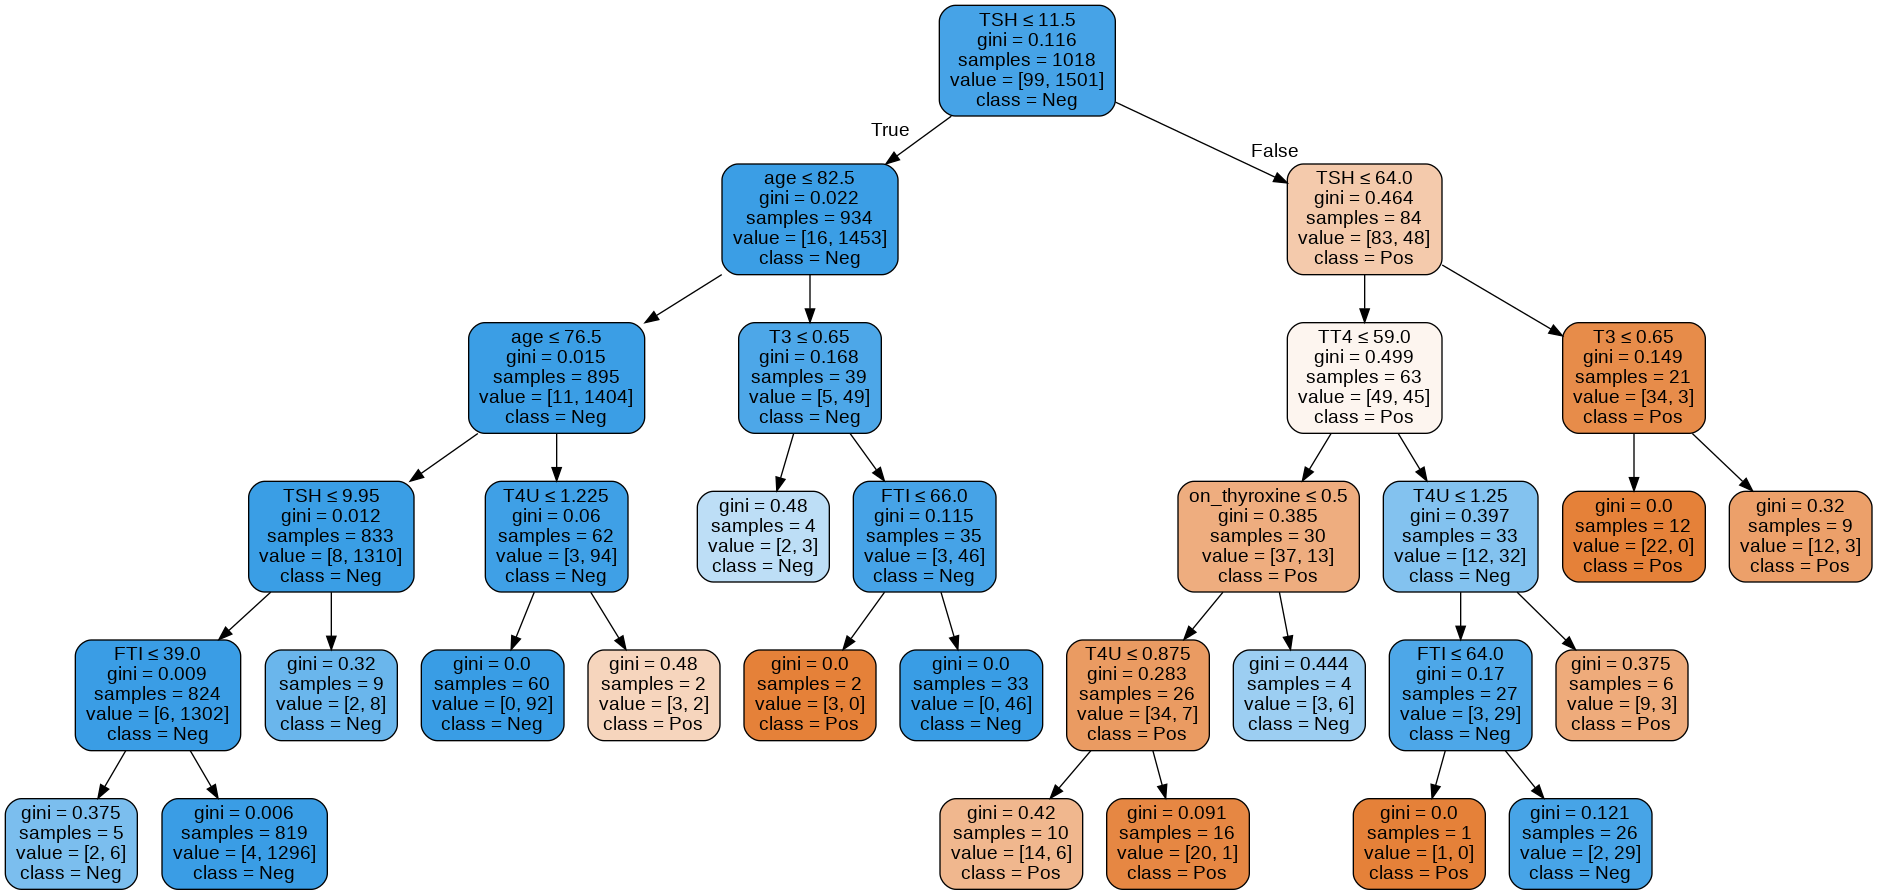

In [199]:
#get specific tree from random forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names = ['Pos','Neg'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hyperthyroid_new.png')
Image(graph.create_png())

Now, lets use an **AdaBoost Classifier** to see its effect on the accuracy of our model.

In [200]:
#import AdaBoostClassifier to boost the decision trees for better prediction and less overfitting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


In [201]:
# initialise AdaBoost model
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)
#train and test the adaboost model

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


In [202]:
accu = accuracy_score(y_test,y_pred_ada)
accu * 100

#adding an adboost Classifier increases our prior model accuracy by about 1.5%

99.25

The AdaBoost classifier increased our predictive accuracy by about 1.5%. This is a significant improvement.

**For the purpose of this project,an AdaBoost classifier model dor optimizing decision trees seems to be the most ideal giving us an accuracy level of about 99.25%**

## Support Vector Machines
Now, we will build a variety of SVMs,optimize them and compare their accuracy to the test data. First, we will do some cleaning and data sampling to ensure that we have 50% of the train and test data containing individuals with Hypothyroid. This is important to build the SVM.

**Downsampling the data for SVM models.**

In [203]:
#reduce sample to include 50% positive and 50% negative
#0 = positive diagnosis
pos_df = df[df['status'] == 0]

In [204]:
pos_df.shape

(122, 24)

In [205]:
mydf = df[df['status'] == 1]

In [206]:
from sklearn.utils import resample
pos_sample = resample(pos_df,replace = False,n_samples = 100,random_state = 42)

In [207]:
neg_sample = resample(mydf,replace = False,n_samples = 100,random_state = 42)

In [208]:
#now concatenate the data
#first check shape of both data sets
print(pos_sample.shape)
print(neg_sample.shape)

(100, 24)
(100, 24)


In [209]:
#use pd.concat
newdf = pd.concat([pos_sample,neg_sample])

In [210]:
#now our data is downsampled and ready to build SVMs
newdf.shape

(200, 24)

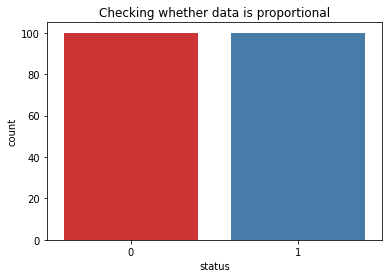

In [211]:
sns.countplot(x = 'status',palette='Set1',data =newdf)
plt.title('Checking whether data is proportional')
plt.show()

#now the data is well sampled

Now that we have a good and **proportional sample**,lets build the SVMs.

## Linear Kernel Function

In [212]:
#use Support Vector Machines using a linear kernel function
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import train_test_split


In [213]:
#now, using two features for prediction and a Linear SVM
myfeat = ['TT4','FTI']
#fit a linear kernel function model
X = newdf[myfeat].values
y = newdf['status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

mymodel = SVC(kernel = 'linear')

mymodel.fit(X_train,y_train)
#now predict on new data
mypred = mymodel.predict(X_test)
#get accuracy of Support vector Machine
myaccr = accuracy_score(y_test,mypred)
myaccr * 100

92.5

**Model has a 92.5 % accuracy. Now lets visualize the hyperplane and Support Vectors**

In [214]:
newdf['TT4'].describe()

count    200.000000
mean      75.092500
std       52.267394
min        2.000000
25%       33.750000
50%       69.000000
75%      107.250000
max      230.000000
Name: TT4, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


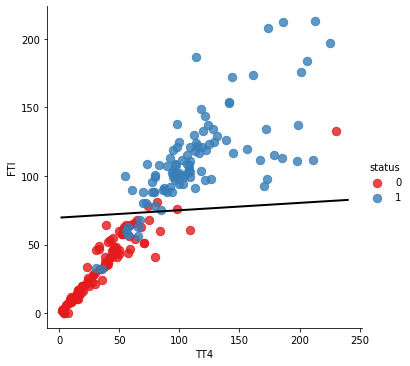

In [215]:
#plotting a svm
# Get the separating hyperplane
w = mymodel.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1] 
xx = np.linspace(2, 240)
yy = a * xx - (mymodel.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TT4', 'FTI', data=newdf, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


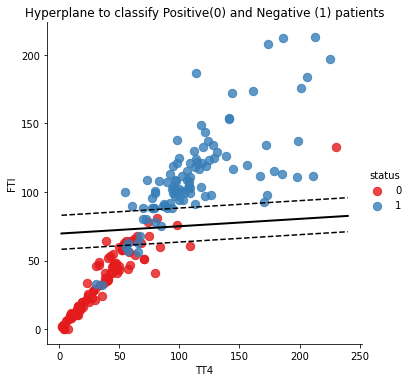

In [216]:
# Now Plotting the parallels to the separating hyperplane that pass through the support vectors
b = mymodel.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = mymodel.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('TT4', 'FTI', data=newdf, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') 
plt.plot(xx, yy_up, 'k--')
plt.title('Hyperplane to classify Positive(0) and Negative (1) patients')
plt.scatter(mymodel.support_vectors_[:, 0], mymodel.support_vectors_[:, 1],s=80, facecolors='none');

## Polynomial Kernel Function

In [217]:
#now, using two features for prediction we have
myfeat = ['TT4','FTI']

X = newdf[myfeat].values
y = newdf['status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)


In [218]:
#now lets use a different kernel
# Building the model 
mypoly = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
mypoly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [219]:
#now predict on new data
mypred = mypoly.predict(X_test)
#get accuracy of Support vector Machine
myacc = accuracy_score(y_test,mypred)
myacc * 100

#the accuracy increases when using a polynomial kernel function


95.0

**Model performance improved by about 3% compared to the Linear Kernel Function.**

Lets visualize its plane

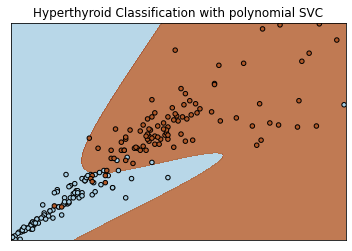

In [196]:
#plotting a svm
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = mypoly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hyperthyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, mypoly, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Radial Basis Function (RBF) model
**Do not run these cells since they exhaust RAM on machine**

In [197]:
#now, using two features for rbf model we have
myfeat = ['TT4','FTI']

X = newdf[myfeat].values
y = newdf['status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [205]:
# Building the model 
rbfmodel = SVC(kernel='rbf',gamma='auto',C=1)
# Training the model using the training set
rbfmodel.fit(X_train, y_train)



SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [206]:
#now predict on new data
mypred = rbfmodel.predict(X_test)
#get accuracy of rbf kernel Support vector Machine
myaccr = accuracy_score(y_test,mypred)
myaccr * 100

#model accuracy using radial basis Function dropped significantly
#changing the gamma and Regularisation (C) values only reduced the accuracy of predictions

77.5

**Model accuracy reduced significantly.**

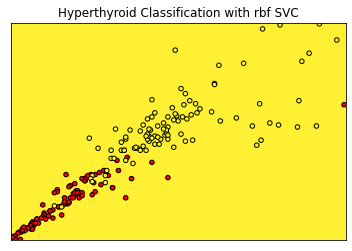

In [207]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfmodel.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hyperthyroid Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfmodel, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

## Comparing the SVM models.


Comparing the three SVM models, the polynomial function has the best accuracy.

Now we will use the polynomial kernel function with **additional features** and compare the accuracy with the original model

In [73]:
newdf.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [74]:
myfeat = ['TT4','FTI','T4U','TSH','age','sex']

from sklearn.decomposition import PCA

dat = newdf[myfeat].values
y = newdf['status'].values
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(dat)
X = pca.transform(dat)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
# Building the model 
newpoly = SVC(kernel='poly',degree=3,gamma='auto',C=1)
# Training the model using the training set
newpoly.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
#now get and compare accuracies
mypred = newpoly.predict(X_test)
#get accuracy of Support vector Machine
myacc = accuracy_score(y_test,mypred)
myacc * 100

#the accuracy of the model is at 100%
#this is significantly higher when more features are added

100.0

The accuracy of the model is at 100%

**This is significantly higher when more features are added. This could result in Overfitting and fail when subjected to new data. For this reason, the initial polynomial Kernel model is the most ideal for our problem as it will generalise the data.**